In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image


In [3]:
base_dir = '/content/drive/MyDrive/ktintern/'

inceptionV3_model = tf.keras.models.load_model(os.path.join(base_dir, 'checkpoints/inceptionV3_model.h5'))

In [16]:
clothes_info = {
    0: 'jeans', 1: 'coat', 2: 'knit',
    3: 'longpants', 4: 'longsleeve', 5: 'padding',
    6: 'shirt', 7: 'shortpants', 8: 'shortsleeve', 
    9: 'skirt', 10: 'socks'
}
# clothes_info = {
#     0: '0_coat', 1: '1_padding', 2: '2_shortsleeve',
#     3: '3_longsleeve', 4: '4_shirt', 5: '5_pants', 6: '6_dress'
# }

In [35]:
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background
    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

def get_test_image(path):
  image = load_img(path, color_mode='rgba', target_size=(299, 299))
  display(image)
  image = img_to_array(image)
  image = rgba2rgb(image)
  # image = image[80:-80, 80:-80]

  plt.imshow(image, interpolation='nearest')
  plt.show()

  image = np.expand_dims(image, axis=0)
  image = image.astype('float32')
  image = image / 255.0
  return image

def get_prediction(test_image):
  prediction = inceptionV3_model.predict(test_image)
  pred = prediction[0]
  
  plt.barh(list(clothes_info.values()), pred)
  plt.show()

  print(clothes_info[np.argmax(prediction)])

In [36]:
test_dir = os.path.join(base_dir, 'datasets', 'deep_test', 'test2')

In [37]:
for (root, directories, files) in os.walk(test_dir):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)
        test_image = get_test_image(file_path)
        get_prediction(test_image)

Output hidden; open in https://colab.research.google.com to view.

In [38]:
test_dir2 = os.path.join(base_dir, 'datasets', 'deep_test', 'test1')

/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out.png


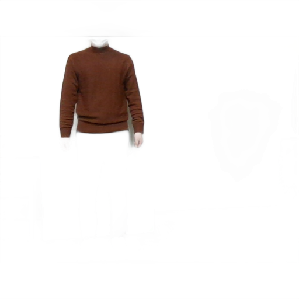

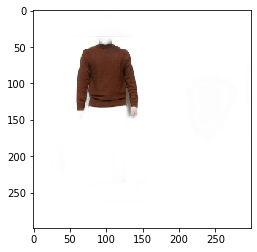

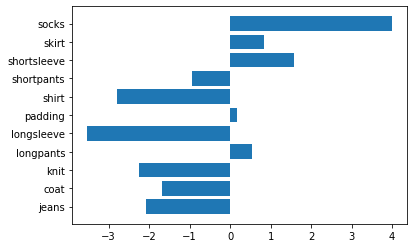

socks
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out_cropped.png


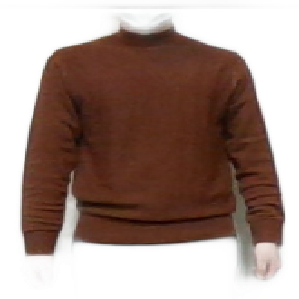

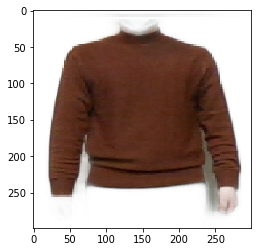

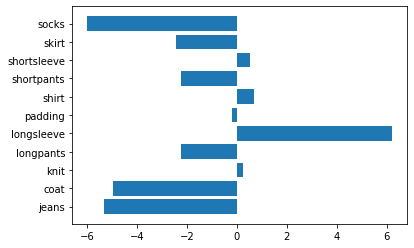

longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out.jpg


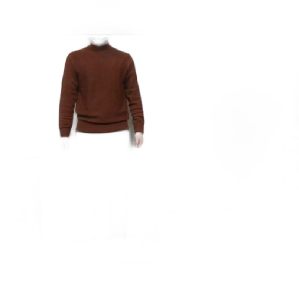

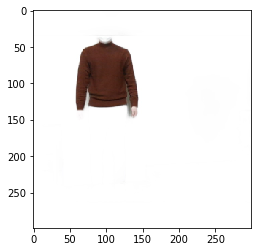

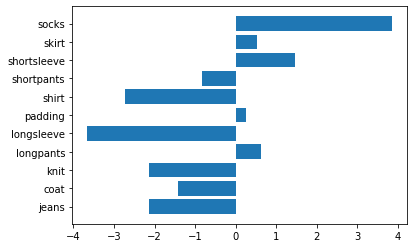

socks
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_1.png


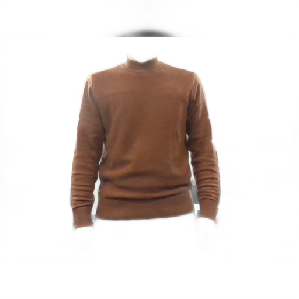

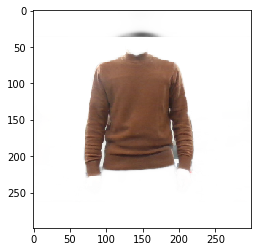

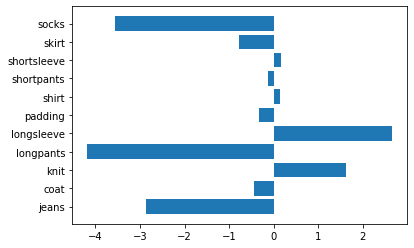

longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_2.png


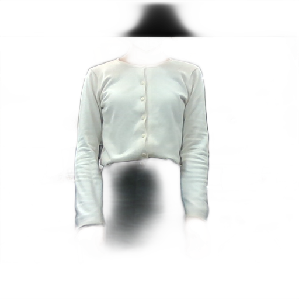

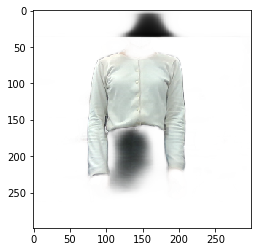

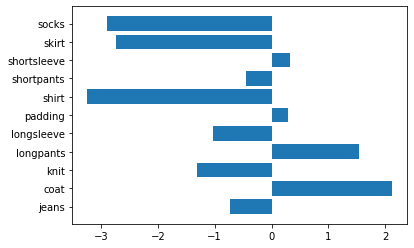

coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_3.png


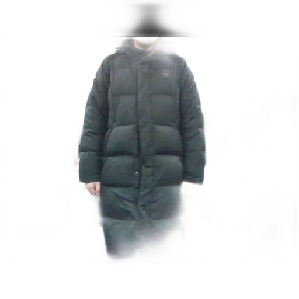

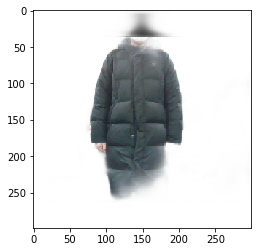

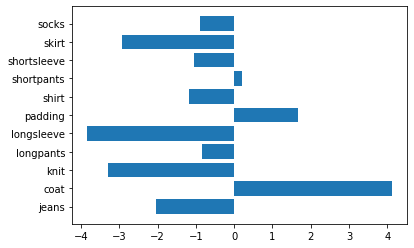

coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_4.png


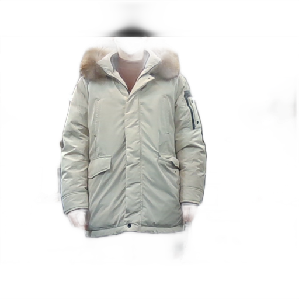

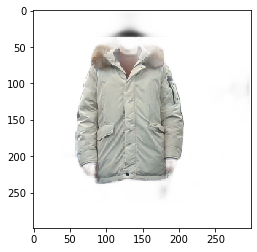

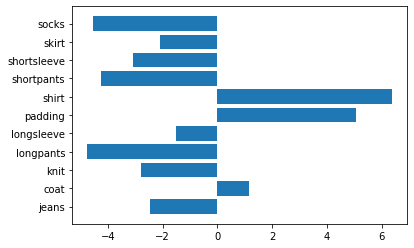

shirt
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_3_2.PNG


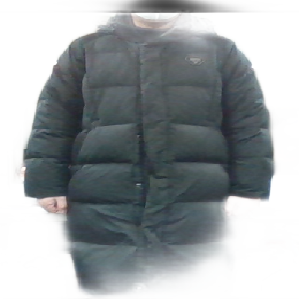

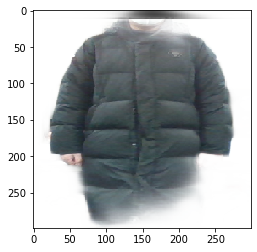

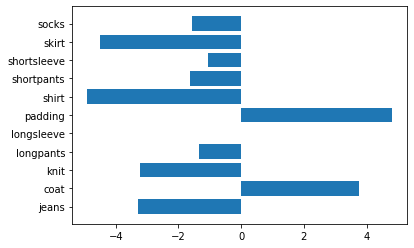

padding
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_2_2.PNG


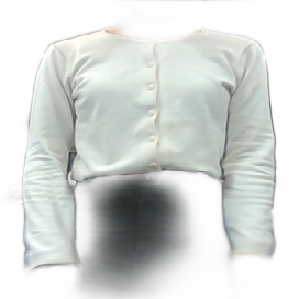

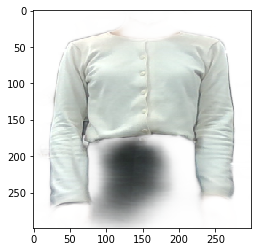

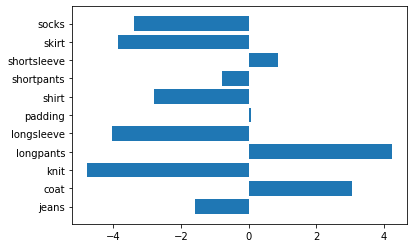

longpants
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_1_2.PNG


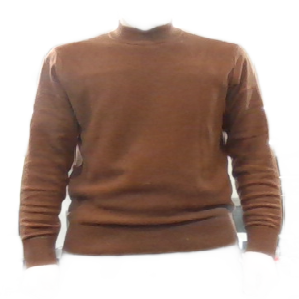

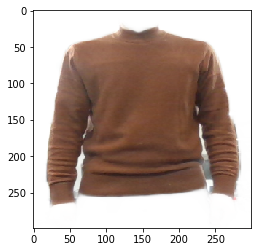

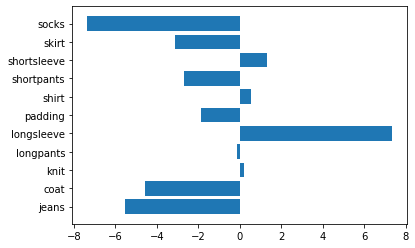

longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out2_4_2.PNG


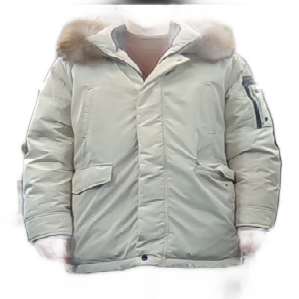

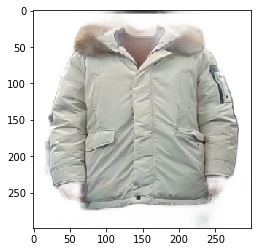

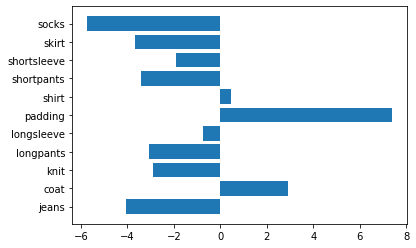

padding
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out3_1.png


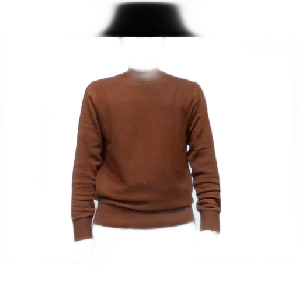

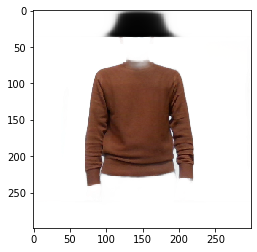

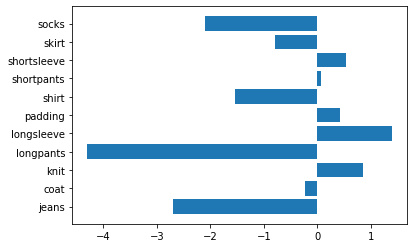

longsleeve
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out3_4.png


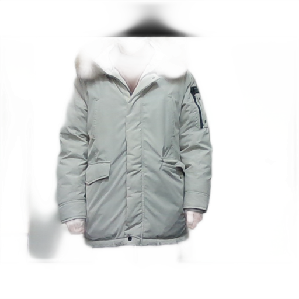

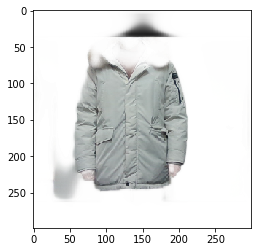

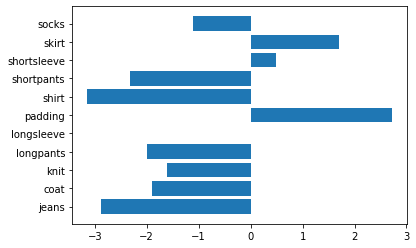

padding
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out3_2.png


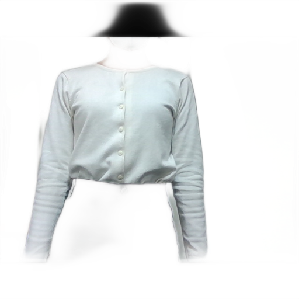

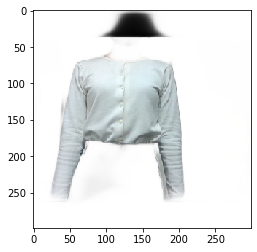

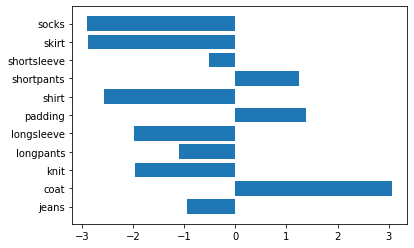

coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out3_3.png


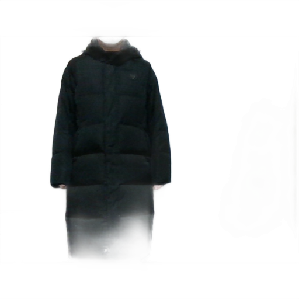

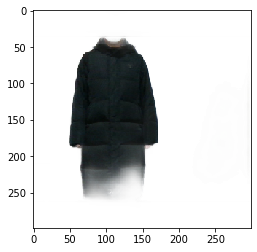

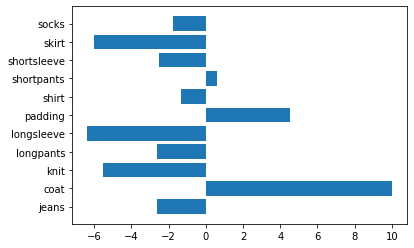

coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out4_1.png


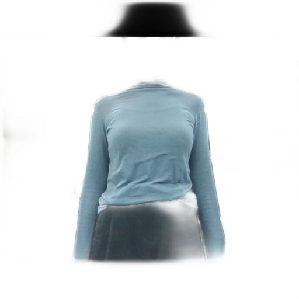

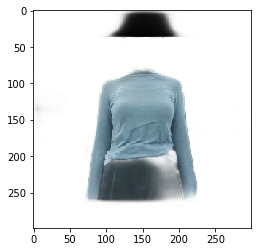

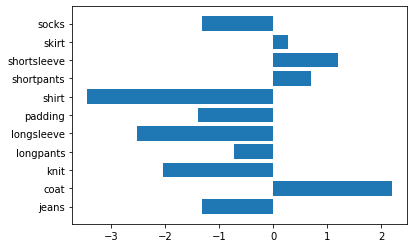

coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out4_2.png


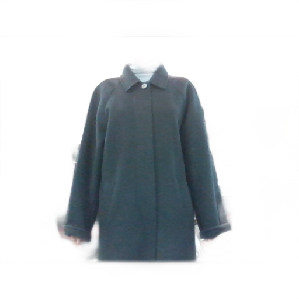

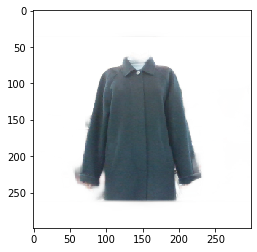

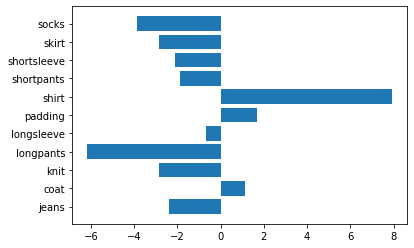

shirt
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out4_3.png


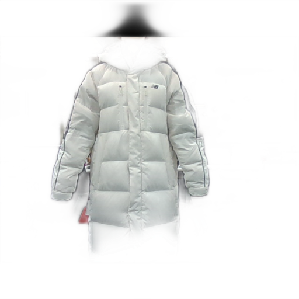

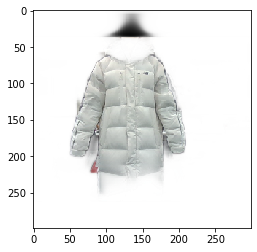

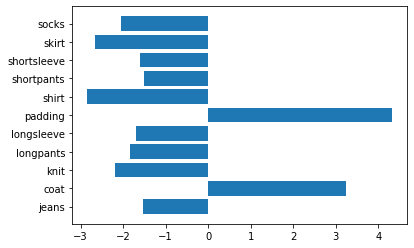

padding
/content/drive/MyDrive/ktintern/datasets/deep_test/test1/out4_4.png


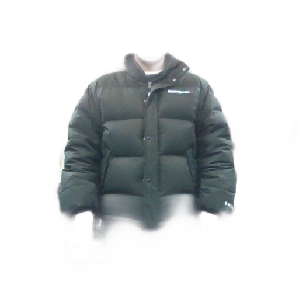

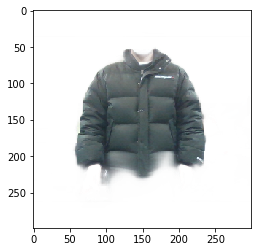

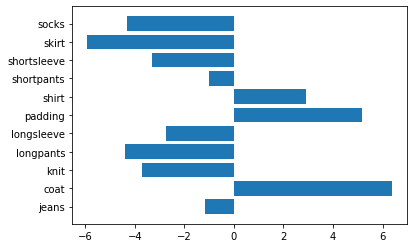

coat


In [39]:
for (root, directories, files) in os.walk(test_dir2):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)
        test_image = get_test_image(file_path)
        get_prediction(test_image)

In [ ]:
test_dir3 = os.path.join(base_dir, 'datasets', 'deep_test', 'test3')

/content/drive/MyDrive/ktintern/datasets/deep_test/test3/2021-12-31 103153.790176.png


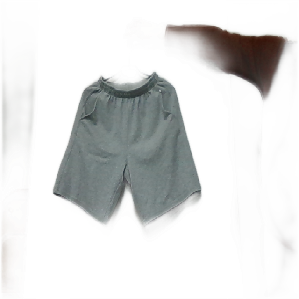

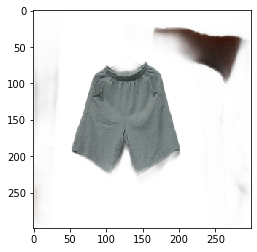

[[-0.69331914  3.2827191  -2.0036898  -1.7142398  -4.9487042   0.7819769
  -2.389915    5.002456   -0.2596829  -3.7265637  -0.98419803]]
shortpants
/content/drive/MyDrive/ktintern/datasets/deep_test/test3/2021-12-31 103342.765198.png


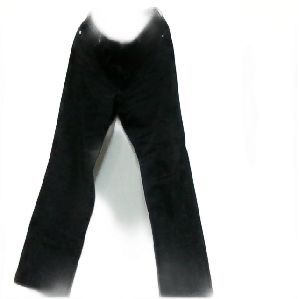

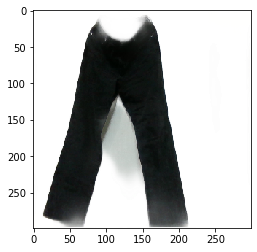

[[-0.51902264 -3.528145   -3.090118    9.766629    0.34388697 -0.53113604
  -7.215979   -4.820859    0.21708813 -5.5238185   2.737853  ]]
longpants
/content/drive/MyDrive/ktintern/datasets/deep_test/test3/2021-12-31 103504.381874.png


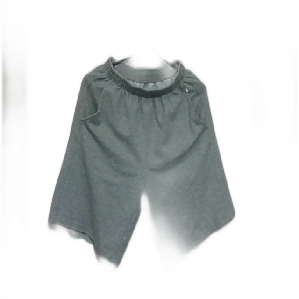

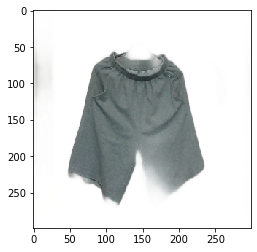

[[-1.062476   4.589166  -3.3732662 -1.6033294 -2.4210773  1.5269296
   3.4955971 -0.5678186 -1.9650705 -7.93747   -3.1274278]]
coat
/content/drive/MyDrive/ktintern/datasets/deep_test/test3/2021-12-31 103722.142502.png


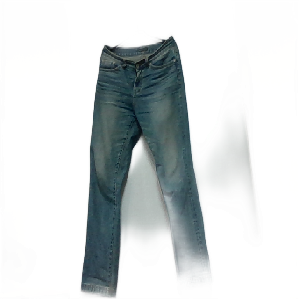

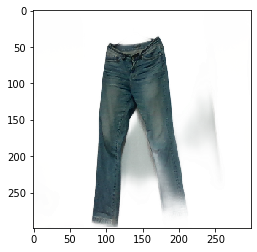

[[ 1.4358518  -3.0681176  -3.575487   10.323782   -0.92197436 -0.9849416
  -5.323669   -5.75912     1.2268946  -3.4876416  -1.0624702 ]]
longpants
/content/drive/MyDrive/ktintern/datasets/deep_test/test3/2021-12-31 103754.333599.png


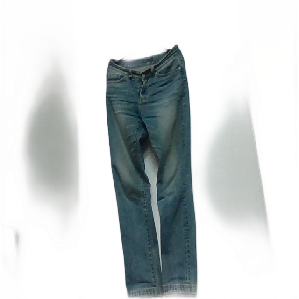

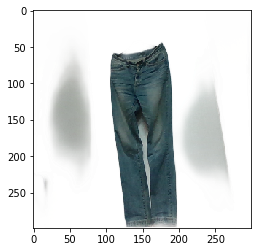

[[ 0.11859842 -3.7385228  -4.5723476   9.340264   -2.8220084  -2.6149414
  -5.232931   -5.502218    2.1504345   0.48815086  0.1339616 ]]
longpants
/content/drive/MyDrive/ktintern/datasets/deep_test/test3/2021-12-31 103858.958387.png


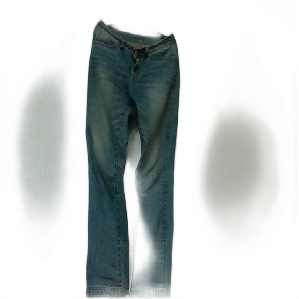

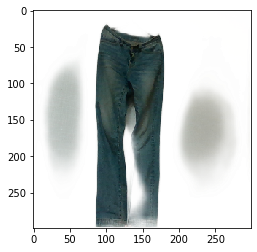

[[-1.0615569  -4.451601   -5.8314953  12.681751   -3.4816065  -1.9378642
  -5.445487   -8.273017    1.6737764   0.47276884  0.43941757]]
longpants
/content/drive/MyDrive/ktintern/datasets/deep_test/test3/out (1).png


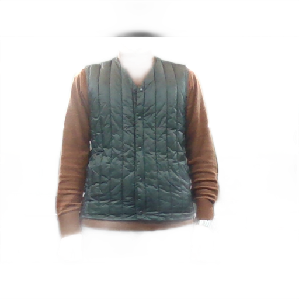

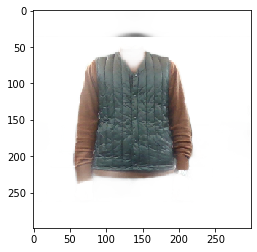

[[-3.348409    1.6492568  -1.6169235  -6.965633    0.7259343   0.83338094
   6.198768   -0.8006487  -3.6258168   1.2617692  -5.7403874 ]]
shirt
/content/drive/MyDrive/ktintern/datasets/deep_test/test3/out1.png


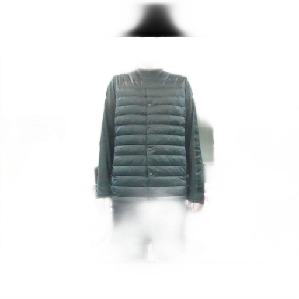

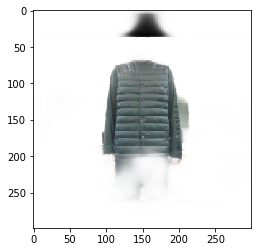

[[-2.6549423   1.7998652  -1.6218956  -1.2424667  -2.8864894  -0.49311948
  -1.9578078   0.4796576   0.5431401  -0.14608748  0.24976191]]
coat


In [ ]:
for (root, directories, files) in os.walk(test_dir3):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)
        test_image = get_test_image(file_path)
        get_prediction(test_image)

In [ ]:
test_dir4 = os.path.join(base_dir, 'datasets', 'deep_test', 'test4')
for (root, directories, files) in os.walk(test_dir4):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)
        test_image = get_test_image(file_path)
        get_prediction(test_image)

Output hidden; open in https://colab.research.google.com to view.